# **EDOME: Extended DOME (data, optimization, model, and evaluation)**
EDOME computes metrics specified by Walsh ([Walsh et al. 2021](https://doi.org/10.1038/s41592-021-01205-4)) and de Azevedo ([de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449)) to predict the performance of regression models of biological systems. Our goal is to assess the Euclidean distance (L2 norm) of machine-learning models and features from an ideal model with the following coordinates: mean absolute error (MAE) = 0.0, coefficient of determination (R2) = 1.0, and root-mean squared error (RMSE) = 0.0. We also combine the DOME strategy ([Walsh et al. 2021](https://doi.org/10.1038/s41592-021-01205-4)) with Spearman's (r) and Pearson's (r) correlation coefficients (Extended DOME). This code employs a set of metrics implemented in the Scikit-Learn library ([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)).
The metrics EDOMEr2 and EDOMEr add r2 (squared Pearson correlation) and r (Spearman correlation) to the Euclidean distance equation (DOME), respectively. The last metric is EDOME ([de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449)). We employ the following metrics for model evaluation: r2, r, RMSE, MAE, and R2. The goal is to evaluate the distance of a machine-learning model from an ideal model with the following coordinates: r2 = 1.0, r = 1.0, RMSE = 0.0, MAE = 0.0, and R2 = 1.
<br> </br>
<img src="https://drive.usercontent.google.com/download?id=1GZcW3143SOB8uqjStbVb23LvRFaYvcbW&export=view&authuser=0" width=600 alt="EDOME Flowchart">
<br><i>Schematic flowchart for EDOME. It reads binding affinity data from a CSV file with features and scoring functions and calculates metrics and generates a 2D plot. EDOME reads edo.in to define plot parameters. It determines the predictive performance of scoring functions using metrics defined elsewhere ([Walsh et 2021](https://doi.org/10.1038/s41592-021-01205-4); [de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449)).</i></br>
<br> </br>
**References**

de Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF, Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of machine-learning models to explore the scoring function space. J Comput Chem. 2024; 45(27): 2333–2346. [DOI](https://doi.org/10.1002/jcc.27449)

Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830. [DOI](https://doi.org/10.48550/arXiv.1201.0490)

Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME: recommendations for supervised machine learning validation in biology. Nat Methods. 2021;18(10):1122-1127. [DOI](https://doi.org/10.1038/s41592-021-01205-4)


################################ EDOME Metrics #################################
# Number of features read from (/content/binding_test.csv): 472                #
# Determining metrics (/content/binding_test_stats.csv)...done!                #
# Generating plot (edome.pdf)...done!                                          #
################################################################################

################################## References ##################################
# DOI: https://doi.org/10.1002/jcc.27449                                       #
# DOI: https://doi.org/10.48550/arXiv.1201.0490                                #
# DOI: https://doi.org/10.1038/s41592-021-01205-4                              #
################################################################################


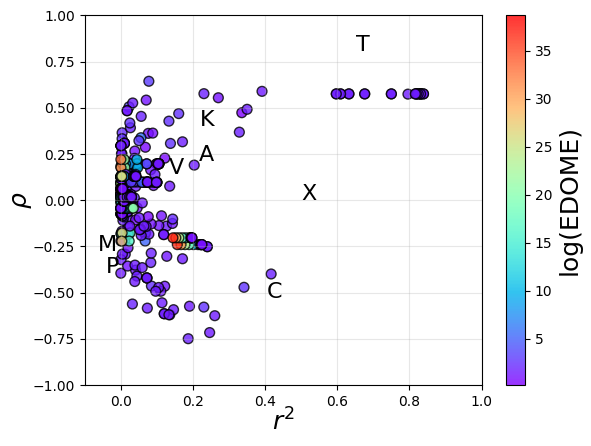

In [1]:
################################################################################
# Define variables for references related to this program                      #
################################################################################
doistr = "DOI: https://doi.org/"
sandres2doi = "10.1002/jcc.27449"
scilearndoi = "10.48550/arXiv.1201.0490"
domedoi = "10.1038/s41592-021-01205-4"

################################################################################
# Define show_line() function                                                  #
################################################################################
def show_line(c_line):
    """Function to show a formatted line."""
    # Define auxiliary variables
    s1 = " "
    h1 = "#"

    # Prepare and show line
    n_line = len(c_line)
    comp = f"{(77 - n_line)*s1}{h1}"
    print(f"{h1} {c_line}{comp}")

################################################################################
# Define show_title() function                                                 #
################################################################################
def show_title(n1,c_title,n2):
    """Function to show a formatted line."""
    # Define auxiliary variable
    h1 = "#"

    # Prepare and show line
    print(f"\n{n1*h1}{c_title}{n2*h1}")

################################################################################
# Define show_references()                                                     #
################################################################################
def show_references(c_line_list):
    """Function to show references given as a list."""
    # Call show_title() function
    show_title(34," References ",34)

    # Looping through c_line_list
    for c_line in c_line_list:
        # Add doistr to c_line
        c_line = doistr+c_line

        # Call show_line() function
        show_line(f"{c_line}")
    print(80*"#")

################################################################################
# Define read_dictionary() function                                            #
################################################################################
# Define read_dictionary() function
def read_dictionary(dict_file):
    """Function to read a file with parameters stored as Python dictionaries.
    """
    # Import section
    import ast

    # Open dictionary
    with open(dict_file) as f:
            data_in = f.read()

    # Reconstructing the data_in as a dictionary
    dict = ast.literal_eval(data_in)

    # Return dict
    return dict

################################################################################
# Define Walsh_and_de_Azevedo_regression_metrics() function                    #
################################################################################
def Walsh_and_de_Azevedo_regression_metrics(y,y_pred):
    """
    Function to calculate regression metrics as recommended by
    [Walsh et 2021](https://pubmed.ncbi.nlm.nih.gov/34316068/)
    and [de Azevedo Jr et al., 2024](https://pubmed.ncbi.nlm.nih.gov/38900052/)).

        Parameters:

        y (dataframe):                  y
        y_test (dataframe):             y test set

        where n is the number of instances.

    <br></br>
    **References**
    <br> </br>
    De Azevedo WF, Leclerc S, Meijer L, Havlicek L, Strnad M, Kim SH.
    Inhibition of cyclin-dependent kinases by purine analogues: crystal
    structure of human cdk2 complexed with roscovitine. Eur J Biochem. 1997;
    243(1-2): 518-26. PMID: 9030780.
    [DOI: 10.1111/j.1432-1033.1997.0518a.x]
    (https://doi.org/10.1111/j.1432-1033.1997.0518a.x)
    <br></br>
    Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine
    Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME:
    recommendations for supervised machine learning validation in biology.
    Nat Methods. 2021; 18(10): 1122-1127.
    [DOI: 10.1038/s41592-021-01205-4]
    (https://doi.org/10.1038/s41592-021-01205-4)
    [PubMed](https://pubmed.ncbi.nlm.nih.gov/34316068/)
    <br></br>

    """
    # Import section
    from sklearn.metrics import median_absolute_error
    from scipy import stats
    import numpy as np

    # Determine metrics
    n = len(y)
    y_bar = y.mean()
    rss = np.sum( np.square(y_pred - y) )
    rmse =  np.sqrt( (np.sum( (y - y_pred)**2 ))/n )
    ss_res = np.sum( (y - y_pred)**2 )
    ss_tot = np.sum( (y - y_bar)**2 )
    R2 = 1 - ss_res/ss_tot
    mae = median_absolute_error(y,y_pred)
    r_pearson,p_pearson = stats.pearsonr(y,y_pred)
    rho,p_spearman = stats.spearmanr(y,y_pred)
    core_dome = rmse**2 + mae**2 + (R2 -1)**2
    dome =    np.sqrt( core_dome )
    edomer2 = np.sqrt( core_dome + (r_pearson**2 - 1)**2 )
    edomerho =np.sqrt( core_dome + (rho**2 - 1)**2 )
    edome =   np.sqrt( core_dome + (r_pearson**2 - 1)**2 + (rho**2 - 1)**2 )

    # Return metrics
    return r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,edomer2,\
    edomerho,edome

################################################################################
# Define metrics_calc() function                                               #
################################################################################
def metrics_calc(rmse_in,mae_in,r2_in,rho_in,R2_in):
    """Function to calculate DOME statistical analysis"""
    # Import section
    import numpy as np

    # Define calc_Euclidean_dist function
    def calc_Euclidean_dist(p1,p2):
        """Function to calculate Euclidean distance for two points in in an
        N-dimensional space"""

        # Calculate Euclidean distance using linalg.norm()
        dist = np.linalg.norm(p1 - p2)

        # Return Euclidean distance
        return dist

    # Calculate Euclidean distances for metrics
    #
    # For dist_DOME, we have this space composed of
    # RMSE (root mean squared error), MAE (mean absolute error),
    # and R2 (coefficient of determination). Our goal is to evaluate the
    # distance of a machine-learning model from an ideal model with the
    # following coordinates:  RMSE = 0.0, MAE = 0.0, and R2 = 1.0.
    p1 = np.array([rmse_in,mae_in,R2_in])
    p2 = np.array([0.0,0.0,1.0])
    dist_DOME = calc_Euclidean_dist(p1,p2)

    # For dist_EDOMEr2, we have this space composed of
    # r2 (square Pearson correlation),
    # RMSE (root mean squared error), MAE (mean absolute error),
    # and R2 (coefficient of determination). Our goal is to evaluate the
    # distance of a machine-learning model from an ideal model with the
    # following coordinates:  r2 = 1.0, RMSE = 0.0,
    # MAE = 0.0, and R2 =1.0.
    p1 = np.array([r2_in,rmse_in,mae_in,R2_in])
    p2 = np.array([1.0,0.0,0.0,1.0])
    dist_EDOMEr2 = calc_Euclidean_dist(p1,p2)

    # For dist_EDOMErho, we have this space composed of
    # rho (Spearman rank correlation),
    # RMSE (root mean squared error), MAE (mean absolute error),
    # and R2 (coefficient of determination). Our goal is to evaluate the
    # distance of a machine-learning model from an ideal model with the
    # following coordinates:  rho = 1.0, RMSE = 0.0,
    # MAE = 0.0, and R2 =1.0.
    p1 = np.array([rho_in,rmse_in,mae_in,R2_in])
    p2 = np.array([1.0,0.0,0.0,1.0])
    dist_EDOMErho = calc_Euclidean_dist(p1,p2)

    # For dist_EDOME, we have this space composed of
    # r2 (square Pearson correlation), rho (Spearman rank correlation),
    # RMSE (root mean squared error), MAE (mean absolute error),
    # and R2 (coefficient of determination). Our goal is to evaluate the
    # distance of a machine-learning model from an ideal model with the
    # following coordinates:  r2 = 1.0, rho = 1.0, RMSE = 0.0,
    # MAE = 0.0, and R2 =1.0.
    p1 = np.array([r2_in,rho_in,rmse_in,mae_in,R2_in])
    p2 = np.array([1.0,1.0,0.0,0.0,1.0])
    dist_EDOME = calc_Euclidean_dist(p1,p2)

    # Return results
    return dist_DOME,dist_EDOMEr2,dist_EDOMErho,dist_EDOME

################################################################################
# Define edome_stats() method                                                  #
################################################################################
def edome_stats():
    """Function to run statistical analysis of all features using EDOME
    metrics."""
    # Import section
    import numpy as np
    import pandas as pd
    from scipy import stats
    from sklearn.metrics import mean_squared_error

    # Call functions.read_dictionary("/content/edo.in") function
    dict = read_dictionary("/content/edo.in")
    edome = dict.get("edome")
    target_label = edome["target_label"]
    labels4metrics = edome["labels4metrics"]
    edome_plt_csv_file = edome["edome_plt_csv_file"]
    edome_plt_csv_stats = edome["edome_plt_csv_stats"]
    labels4edome = edome["labels4edome"]

    # Call show_title() function
    show_title(32," EDOME Metrics ",33)

    # Get the number of labels
    n_labels = len(labels4metrics)

    # Call show_line() function
    c_line = f"Number of features read from ({edome_plt_csv_file}): "
    c_line += f"{n_labels}"
    show_line(f"{c_line}")

    # Show message
    h1 = "#"
    s1 = " "
    c_line = f"Determining metrics ({edome_plt_csv_stats})..."
    n_line = len(c_line)
    comp = f"{(72 - n_line)*s1}"
    print(f"{h1} {c_line}",end = "")

    # Read a CSV file as a dataframe
    df = pd.read_csv(edome_plt_csv_file)

    # Get experimental data
    y_exp = df.loc[:,target_label]

    # Set up an empty string
    lines_out = ""

    # Looping through data
    for col in labels4metrics:

        # Get predicted values
        y_pred = df[col]

        rp,p_r,rho,p_rho,rss,rmse,mae,R2cd,dome,edomer2,\
        edomerho,edome = Walsh_and_de_Azevedo_regression_metrics(y_exp,y_pred)

        # Calculate r2
        r2 = rp*rp

        # Calculate MSE
        mse = mean_squared_error(y_exp,y_pred)

        # Calculate log(RMSE)
        log_rmse = np.log10(rmse)

        # Calculate log(MAE)
        log_mae = np.log10(mae)

        # Calculate the unbiased sample standard deviation, i.e. it uses a
        # correction factor n / (n - 1).
        sigma1 = stats.tstd(y_pred)

        # Call metrics_calc() function
        DOME,EDOMER2,EDOMErho,EDOME = metrics_calc(rmse,mae,r2,rho,R2cd)

        # Calculate log(DOME)
        log_DOME = np.log10(DOME)

        # Calculate log(EDOMER2)
        log_EDOMER2 = np.log10(EDOMER2)

        # Calculate log(EDOMErho)
        log_EDOMErho = np.log10(EDOMErho)

        # Calculate log(EDOME)
        log_EDOME = np.log10(EDOME)

        # Add results to this_line
        this_line = col+","+str(rp)+","+str(p_r)+","+str(r2)+","+str(rho)
        this_line += ","+str(p_rho)+","+str(mse)
        this_line += ","+str(rmse)+","+str(log_rmse)+","+str(rss)
        this_line += ","+str(mae)+","+str(log_mae)+","+str(R2cd)
        this_line += ","+str(sigma1)
        this_line += ","+str(DOME)+","+str(log_DOME)
        this_line += ","+str(EDOMER2)+","+str(log_EDOMER2)
        this_line += ","+str(EDOMErho)+","+str(log_EDOMErho)
        this_line += ","+str(EDOME)+","+str(log_EDOME)+"\n"
        lines_out += this_line

    # Define header
    header = str(labels4edome).replace("[","").replace("]","").\
                replace("\'","").replace(" ","")+"\n"

    # Open a new file
    fo_new = open(edome_plt_csv_stats,"w")

    # Write data
    fo_new.write(header)
    fo_new.write(lines_out)

    # Close file
    fo_new.close()

    # Show message
    print(f"done!{comp}{h1}")

################################################################################
# Define edome_plotting() function                                             #
################################################################################
def edome_plotting():
    """Function to generate a plot for predictive performance of multiple
    features read from a CSV file."""
    # Import section
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib import cm

    # Call functions.read_dictionary("/content/edo.in") function
    dict = read_dictionary("/content/edo.in")
    edome = dict.get("edome")
    edome_plt_csv_stats = edome["edome_plt_csv_stats"]
    edome_plt_x_header = edome["edome_plt_x_header"]
    edome_plt_y_header = edome["edome_plt_y_header"]
    edome_plt_z_header = edome["edome_plt_z_header"]
    edome_plt_alpha1 = edome["edome_plt_alpha1"]
    edome_plt_size = edome["edome_plt_size"]
    edome_plt_alpha2 = edome["edome_plt_alpha2"]
    edome_plt_edgecolor = edome["edome_plt_edgecolor"]
    edome_plt_cbar_label = edome["edome_plt_cbar_label"]
    edome_plt_cbar_fontsize = edome["edome_plt_cbar_fontsize"]
    edome_plt_xlim1 = edome["edome_plt_xlim1"]
    edome_plt_xlim2 = edome["edome_plt_xlim2"]
    edome_plt_ylim1 = edome["edome_plt_ylim1"]
    edome_plt_ylim2 = edome["edome_plt_ylim2"]
    edome_plt_xlabel = edome["edome_plt_xlabel"]
    edome_plt_xlabel_fontsize = edome["edome_plt_xlabel_fontsize"]
    edome_plt_xlabel_labelpad = edome["edome_plt_xlabel_labelpad"]
    edome_plt_ylabel = edome["edome_plt_ylabel"]
    edome_plt_ylabel_fontsize = edome["edome_plt_ylabel_fontsize"]
    edome_plt_ylabel_labelpad = edome["edome_plt_ylabel_labelpad"]
    edome_plt_file = edome["edome_plt_file"]
    edome_plt_dpi_in = edome["edome_plt_dpi_in"]
    edome_plt_annotate_par = edome["edome_plt_annotate_par"]

    # Read a CSV file as a dataframe
    df = pd.read_csv(edome_plt_csv_stats)

    # Get data for plotting
    x = df[edome_plt_x_header.strip()]
    y = df[edome_plt_y_header.strip()]
    z = df[edome_plt_z_header.strip()]

    # Colors for color map
    colors = z

    # Plotting
    plt.grid(alpha=edome_plt_alpha1)
    plt.scatter(x, y, s=edome_plt_size, alpha=edome_plt_alpha2, c=colors,
            edgecolor=edome_plt_edgecolor,linewidth=1,cmap=cm.rainbow)
    cbar = plt.colorbar()
    cbar.set_label(edome_plt_cbar_label,fontsize=edome_plt_cbar_fontsize)
    plt.xlim(edome_plt_xlim1,edome_plt_xlim2)
    plt.ylim(edome_plt_ylim1,edome_plt_ylim2)
    plt.xlabel(edome_plt_xlabel,fontsize = edome_plt_xlabel_fontsize,
                                            labelpad=edome_plt_xlabel_labelpad)
    plt.ylabel(edome_plt_ylabel,fontsize = edome_plt_ylabel_fontsize,
                                            labelpad=edome_plt_ylabel_labelpad)

    # Get the number of annotations
    annotate_num = len(edome_plt_annotate_par)

    # Annotate the point xy with text text
    # Loop to add text
    if annotate_num > 0:
        for i in range(annotate_num):
            aux_par = edome_plt_annotate_par[i]
            plt.annotate(aux_par[0],(aux_par[1],aux_par[2]),
                                                fontsize=aux_par[3])

    # Show message
    h1 = "#"
    s1 = " "
    c_line = f"Generating plot ({edome_plt_file})..."
    n_line = len(c_line)
    comp = f"{(72 - n_line)*s1}"
    print(f"{h1} {c_line}",end = "")

    # Save plot on pdf file (or .tiff, .jpg, .png)
    plt.savefig(edome_plt_file,dpi=edome_plt_dpi_in)

    # Show message
    print(f"done!{comp}{h1}")
    print(f"{80*h1}")

    # References related to EDOME
    # Define c_line_list
    c_line_list = [sandres2doi,scilearndoi,domedoi]

    # Call show_references() function
    show_references(c_line_list)

################################################################################
# Define main() function                                                       #
################################################################################
def main():
    # Call edome_stats() funciton
    edome_stats()

    # Call plotting() function
    edome_plotting()

# Call main() function
main()